In [4]:
import pandas as pd
import numpy as np

In [7]:
scores = [[20.26, 71.58, 27.06, 97.51],
       [40.61, 72.32, 56.54,  5.45],
       [72.44, 68.89,  6.65, 75.54]],

In [8]:
import pandas as pd

# DataFrame 的列名
index_arr = ["听力", "阅读", "写作", "口试"]

# 从 scores 列表中创建 DataFrame
# index 参数代表行索引
# columns 参数代表列索引
df_scores = pd.DataFrame(scores,
            index = ["小亮", "小明", "小E"],
            columns= index_arr)

# 打印 DataFrame
df_scores

ValueError: 4 columns passed, passed data had 3 columns

In [115]:
# 生成小李的 Series，没有的成绩用 None 取代
ser_xiaol = pd.Series([30.04,None,None,None], index=index_arr,name="小李")

# 将小李的 Series 添加到 df_scores 中
df_scores = df_scores.append(ser_xiaol)

# 查看 df_scores
df_scores


,听力,阅读,写作,口试
小亮,20.26,71.58,27.06,97.51
小明,40.61,72.32,56.54,5.45
小E,72.44,68.89,6.65,75.54
小李,30.04,NaN,NaN,NaN


In [116]:
# 生成小王的 Series，没有的成绩用 None 取代
ser_xiaowang = pd.Series([None, 91.00, 72.34, None], index = index_arr, name="小王")

# 将小王的 Series 添加到 df_scores 中
df_scores = df_scores.append(ser_xiaowang)

# 查看 df_scores
df_scores

,听力,阅读,写作,口试
小亮,20.26,71.58,27.06,97.51
小明,40.61,72.32,56.54,5.45
小E,72.44,68.89,6.65,75.54
小李,30.04,NaN,NaN,NaN
小王,NaN,91.00,72.34,NaN


In [7]:
# 调用 isna 函数，并查看结果
df_scores.isna()

,听力,阅读,写作,口试
小亮,False,False,False,False
小明,False,False,False,False
小E,False,False,False,False
小李,False,True,True,True
小王,True,False,False,True


In [8]:
# 按列聚合缺失值并查看
df_scores.isna().sum()

听力    1
阅读    1
写作    1
口试    2
dtype: int64

In [9]:
# 按行聚合缺失值并查看
df_scores.isna().sum(1)

小亮    0
小明    0
小E    0
小李    3
小王    2
dtype: int64

In [13]:
df_scores.isna().any()


听力    True
阅读    True
写作    True
口试    True
dtype: bool

In [12]:
# 行索引部分，取所有的行
# 列索引部分，取所有包含缺失值的列
# any 函数类似 sum 函数，但any 函数做的是布尔聚合，当列有一个或以上的 True 时，结果就是 True， 否则为 False
df_scores.loc[:, df_scores.isna().any()]

,听力,阅读,写作,口试
小亮,20.26,71.58,27.06,97.51
小明,40.61,72.32,56.54,5.45
小E,72.44,68.89,6.65,75.54
小李,30.04,NaN,NaN,NaN
小王,NaN,91.00,72.34,NaN


In [10]:
# 行索引部分，通过 any(1) 来聚合行维度的结果
# 列索引部分，取所有的列
df_scores.loc[df_scores.isna().any(1),:]

,听力,阅读,写作,口试
小李,30.04,NaN,NaN,NaN
小王,NaN,91.0,72.34,NaN


In [14]:
df_scores.isna().sum().sum()

5

In [15]:
df_scores.dropna()

,听力,阅读,写作,口试
小亮,20.26,71.58,27.06,97.51
小明,40.61,72.32,56.54,5.45
小E,72.44,68.89,6.65,75.54


In [16]:
df_scores.dropna(1)

""
小亮
小明
小E
小李
小王


In [21]:
# 删除正常值小于 2 个的行
df_scores.dropna(thresh=1)

,听力,阅读,写作,口试
小亮,20.26,71.58,27.06,97.51
小明,40.61,72.32,56.54,5.45
小E,72.44,68.89,6.65,75.54
小李,30.04,NaN,NaN,NaN
小王,NaN,91.00,72.34,NaN


In [25]:
# 删除听力一列是缺失值的所有行
df_scores.dropna(subset=["听力"])

,听力,阅读,写作,口试
小亮,20.26,71.58,27.06,97.51
小明,40.61,72.32,56.54,5.45
小E,72.44,68.89,6.65,75.54
小李,30.04,NaN,NaN,NaN


In [26]:
df_scores.写作.dropna()

小亮    27.06
小明    56.54
小E     6.65
小王    72.34
Name: 写作, dtype: float64

In [43]:
df_scores

,听力,阅读,写作,口试
小亮,20.26,71.58,27.06,97.51
小明,40.61,72.32,56.54,5.45
小E,72.44,68.89,6.65,75.54
小李,30.04,NaN,NaN,NaN
小王,NaN,91.00,72.34,NaN


In [42]:
df_scores.fillna(33.0)

,听力,阅读,写作,口试
小亮,20.26,71.58,27.06,97.51
小明,40.61,72.32,56.54,5.45
小E,72.44,68.89,6.65,75.54
小李,30.04,33.00,33.00,33.00
小王,33.00,91.00,72.34,33.00


In [54]:
# 复制一个 DataFrame， 命名为 df_scores_test
df_scores_test = df_scores.copy(deep=True)

# 将听力一列的缺失值填充为 60
df_scores_test["听力"] = df_scores_test["听力"].fillna(60.0)

# 查看
df_scores_test

,听力,阅读,写作,口试
小亮,20.26,71.58,27.06,97.51
小明,40.61,72.32,56.54,5.45
小E,72.44,68.89,6.65,75.54
小李,30.04,NaN,NaN,NaN
小王,60.00,91.00,72.34,NaN


In [52]:
df_scores.听力.fillna(1.2)

小亮    20.26
小明    40.61
小E    72.44
小李    30.04
小王     1.20
Name: 听力, dtype: float64

In [55]:
# 将 小李 一行的缺失值统一填充为 50.0
df_scores_test.loc["小李", :] = df_scores_test.loc["小李",:].fillna("50.0")

# 查看
df_scores_test

,听力,阅读,写作,口试
小亮,20.26,71.58,27.06,97.51
小明,40.61,72.32,56.54,5.45
小E,72.44,68.89,6.65,75.54
小李,30.04,50.0,50.0,50.0
小王,60.00,91,72.34,NaN


In [58]:
df_scores.fillna(method="ffill")

,听力,阅读,写作,口试
小亮,20.26,71.58,27.06,97.51
小明,40.61,72.32,56.54,5.45
小E,72.44,68.89,6.65,75.54
小李,30.04,68.89,6.65,75.54
小王,30.04,91.00,72.34,75.54


In [ ]:
ser_xiaozhao 

In [63]:
df_scores

,听力,阅读,写作,口试
小亮,20.26,71.58,27.06,97.51
小明,40.61,72.32,56.54,5.45
小E,72.44,68.89,6.65,75.54
小李,30.04,NaN,NaN,NaN
小王,NaN,91.00,72.34,NaN


<AxesSubplot:>

C:\Users\appri\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 23567 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\appri\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 20142 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\appri\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 26126 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\appri\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 26446 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\appri\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 29579 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\appri\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 23567 missing from current font.
  

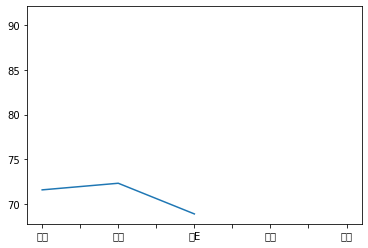

In [68]:
df_scores["阅读"].plot()

In [64]:
df_scores.interpolate()

,听力,阅读,写作,口试
小亮,20.26,71.580,27.060,97.51
小明,40.61,72.320,56.540,5.45
小E,72.44,68.890,6.650,75.54
小李,30.04,79.945,39.495,75.54
小王,30.04,91.000,72.340,75.54


In [71]:
ser_test = pd.Series([100,3, None, None, 9])
ser_test

0    100.0
1      3.0
2      NaN
3      NaN
4      9.0
dtype: float64

In [72]:
# 调用 interpolate 对 Series 进行插值，默认为线性插值
ser_test.interpolate()

0    100.0
1      3.0
2      5.0
3      7.0
4      9.0
dtype: float64

In [65]:
ser_test1 = pd.Series([1,2,3,4,5,None])
ser_test1

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
5    NaN
dtype: float64

In [66]:
ser_test1.interpolate()

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
5    5.0
dtype: float64

In [117]:
# 生成一条一模一样的小王的记录
ser_xiaowang = pd.Series([None, 91.00, 72.34, None], index = index_arr, name="小王")
# 生成另一条小王的 Series，但多丢了一个数据

# 将新增加的两个 Series 添加到 df_scores 中
df_scores = df_scores.append(ser_xiaowang)

# 查看 df_scores
df_scores

,听力,阅读,写作,口试
小亮,20.26,71.58,27.06,97.51
小明,40.61,72.32,56.54,5.45
小E,72.44,68.89,6.65,75.54
小李,30.04,NaN,NaN,NaN
小王,NaN,91.00,72.34,NaN
小王,NaN,91.00,72.34,NaN


In [118]:
 df_scores.duplicated()


小亮    False
小明    False
小E    False
小李    False
小王    False
小王     True
dtype: bool

In [96]:
df_scores.index.duplicated()

array([False, False, False, False, False,  True,  True])

In [119]:
df_scores = df_scores.drop_duplicates()
df_scores

,听力,阅读,写作,口试
小亮,20.26,71.58,27.06,97.51
小明,40.61,72.32,56.54,5.45
小E,72.44,68.89,6.65,75.54
小李,30.04,NaN,NaN,NaN
小王,NaN,91.00,72.34,NaN


In [120]:
# 生成一条一模一样的小王的记录
ser_xiaoyang = pd.Series([None, 91089.00, -72.34, None], index = index_arr, name="小杨")
# 生成另一条小王的 Series，但多丢了一个数据

# 将新增加的两个 Series 添加到 df_scores 中
df_scores = df_scores.append(ser_xiaoyang)

# 查看 df_scores
df_scores

,听力,阅读,写作,口试
小亮,20.26,71.58,27.06,97.51
小明,40.61,72.32,56.54,5.45
小E,72.44,68.89,6.65,75.54
小李,30.04,NaN,NaN,NaN
小王,NaN,91.00,72.34,NaN
小杨,NaN,91089.00,-72.34,NaN


In [9]:
a = [1,2]
print(a)
b = [1,2],
print(b)

[1, 2]
([1, 2],)
